## Overview

In [1]:
# instalação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# visualização do dataset
df = pd.read_csv('top50.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
# informação geral 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


O dataset tem 50 linhas e 14 colunas. Não há a presença de valores ausentes. 
O dataset possui 11 colunas numéricas e 3 categóricas. Uma das colunas, 'Unnamed: 0', é uma coluna de index e pode ser excluída por conter a mesma informação que df.index.
Os nomes das colunas possuem "." na sua descrição. Como uma boa prática, vamos limpar esses pontos e usar underline no lugar. 

## Limpeza

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True) # exclusão coluna index extra
cols = ['track_name','artist_name','genre','bpm','energy',
'danceability','loudness','liveness','valence','length',
'acousticness','speechiness','popularity'] # lista novos nomes de colunas
df.columns = cols #substituição
df.head()

,track_name,artist_name,genre,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


## Análise Exploratória

Text(0.5, 0.98, 'Análises Colunas Numéricas')

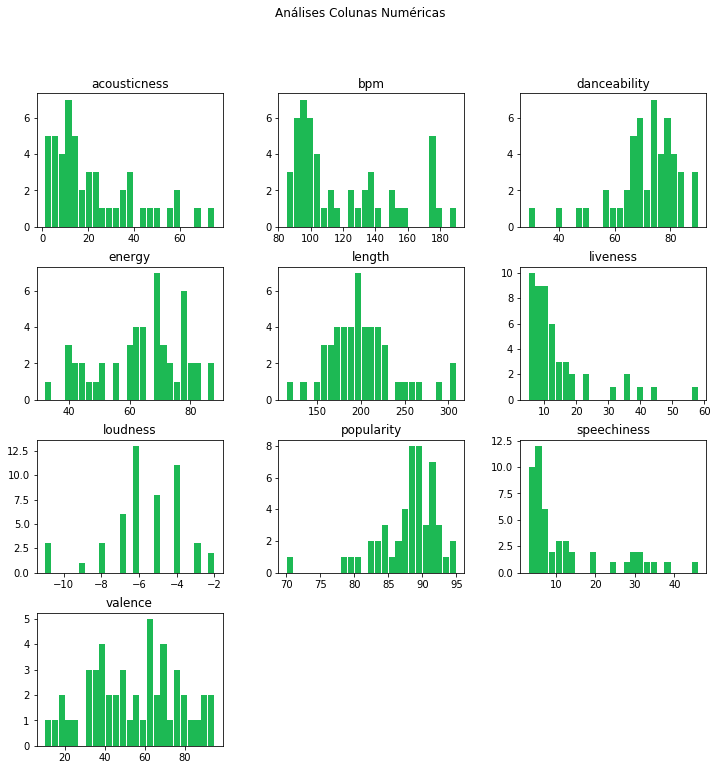

In [5]:
ax = df.hist(bins=25, grid=False, figsize=(12,12), color='#1DB954', zorder=2, rwidth=0.9)
plt.suptitle("Análises Colunas Numéricas")

In [20]:
print("Total de artistas no Top 50:",df.artist_name.nunique())

Total de artistas no Top 50: 38


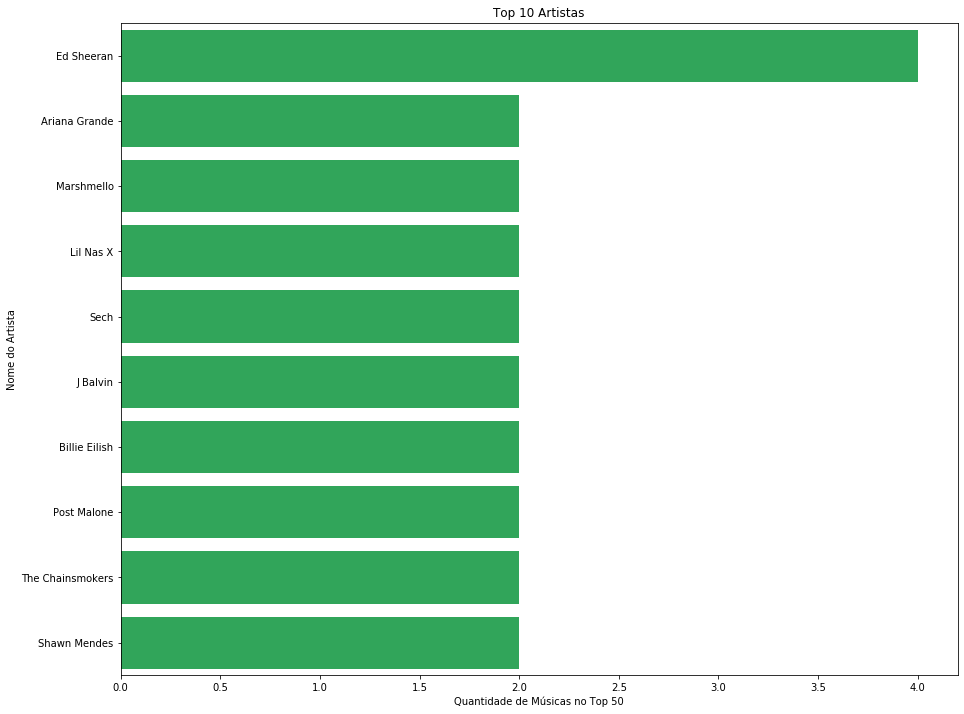

In [18]:
plt.figure(figsize=(15,12))
ax = sns.countplot(y="artist_name",data=df,color='#1DB954',
                   order = df['artist_name'].value_counts().index[:10])
ax.grid(False)
plt.title("Top 10 Artistas")
plt.xlabel('Quantidade de Músicas no Top 50')
plt.ylabel('Nome do Artista')
plt.show()

In [21]:
print("Total de gêneros no Top 50:",df.genre.nunique())

Total de gêneros no Top 50: 21


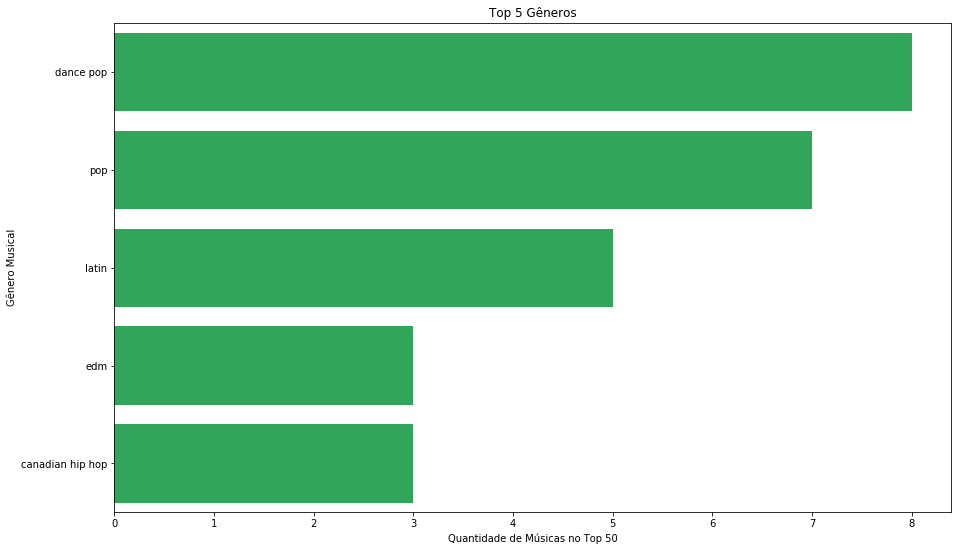

In [24]:
plt.figure(figsize=(15,9))
ax = sns.countplot(y="genre",data=df,color='#1DB954',
                   order = df['genre'].value_counts().index[:5])
ax.grid(False)
plt.title("Top 5 Gêneros")
plt.xlabel('Quantidade de Músicas no Top 50')
plt.ylabel('Gênero Musical')
plt.show()

In [32]:
print("Top 10 Músicas")
df[['track_name','artist_name','popularity']].sort_values(by='popularity',ascending=False)[:10]

Top 10 Músicas


,track_name,artist_name,popularity
9,bad guy,Billie Eilish,95
4,Goodbyes (Feat. Young Thug),Post Malone,94
10,Callaita,Bad Bunny,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,92
1,China,Anuel AA,92
6,Ransom,Lil Tecca,92
36,Otro Trago,Sech,91
21,Panini,Lil Nas X,91
20,Piece Of Your Heart,MEDUZA,91
19,Truth Hurts,Lizzo,91


## Pré Processamento

In [ ]:
features = [c for c in df.columns if c not in ['track_name','artist_name','genre','popularity']]
